In [49]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [51]:
import pandas as pd

rating = pd.read_csv(r"C:\Users\Daniel.Temesgen\Desktop\data\raw_analyst_ratings.csv")

In [52]:
rating['headline']

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

def descriptive_statistics(rating):
    """Perform descriptive statistics on news data."""
    # Headline length analysis
  

In [53]:
    rating['headline_length'] = rating['headline'].str.len()
    print("Headline Length Statistics:")
    print(rating['headline_length'].describe())

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


 # Articles per publisher
   

In [54]:

    publisher_counts = rating['publisher'].value_counts()
    print("\nArticles per Publisher:")
    print(publisher_counts.head(10))


Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


# Publication date trends
    

In [55]:
# Safely convert 'date' column
rating['date'] = pd.to_datetime(rating['date'], errors='coerce')  # optional: 'coerce' turns bad values into NaT
rating['day_of_week'] = rating['date'].dt.day_name()

In [56]:
# Group by date
daily_counts = rating.groupby(rating['date'].dt.date).size()

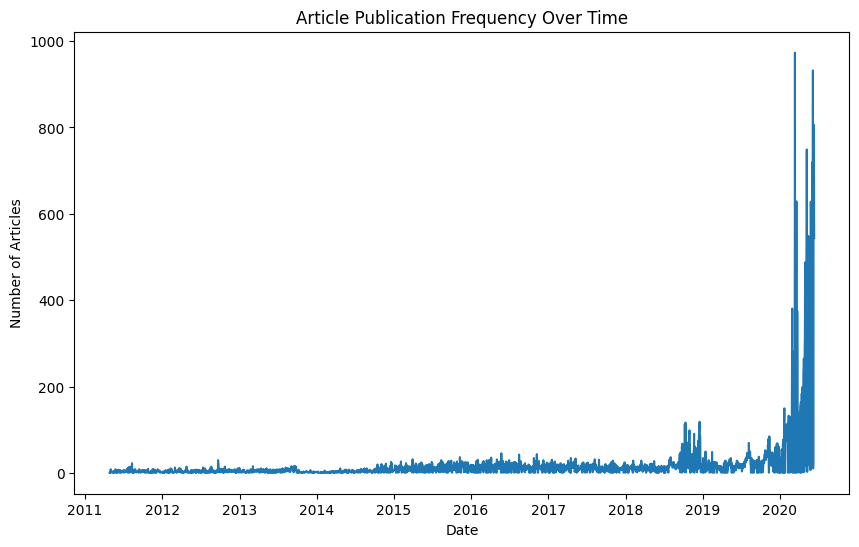

In [58]:
# Plotting
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
daily_counts.plot()
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.savefig('publication_trend.png')
plt.show()

In [59]:
def text_analysis(rating):
    """Perform topic modeling using TF-IDF."""
    stop_words = set(stopwords.words('english'))
    vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(rating['headline'])
    feature_names = vectorizer.get_feature_names_out()
    top_terms = []
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix[i].toarray()[0]
        top_indices = row.argsort()[-5:][::-1]
        top_terms.append([feature_names[idx] for idx in top_indices])
    rating['top_terms'] = top_terms
    print("\nTop Terms per Headline (Sample):")
    print(rating[['headline', 'top_terms']].head())

In [60]:
def publisher_analysis(rating):
    """Analyze publisher domains."""
    rating['domain'] = rating['publisher'].str.extract(r'@([\w\.-]+)')
    domain_counts = df['domain'].value_counts()
    print("\nTop Publisher Domains:")
    print(domain_counts.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=domain_counts.head(10).values, y=domain_counts.head(10).index)
    plt.title('Top 10 Publisher Domains')
    plt.xlabel('Number of Articles')
    plt.savefig('publisher_domains.png')
    plt.show()
    
   

In [61]:
import pandas as pd

def load_data(file_path):
    """Load news data into a pandas DataFrame."""
    rating = pd.read_csv(r'C:\Users\Daniel.Temesgen\Desktop\data\raw_analyst_ratings.csv'
)
    rating['date'] = pd.to_datetime(rating['date'], errors='coerce')  # Safely convert 'date'
    return rating


In [62]:
import pandas as pd

# Function to load data
def load_data(file_path):
    rating = pd.read_csv(file_path)  # ✅ Fixed here
    rating['date'] = pd.to_datetime(rating['date'], errors='coerce')
    return rating

# Descriptive statistics
def descriptive_statistics(rating):
    print("Descriptive Statistics:")
    print(rating.describe(include='all'))
    print("\nMissing Values:")
    print(rating.isnull().sum())

# Placeholder functions
def text_analysis(rating):
    print("Text analysis placeholder")

def publisher_analysis(rating):
    print("Publisher analysis placeholder")

# Load and analyze
rating = load_data(r'C:\Users\Daniel.Temesgen\Desktop\data\raw_analyst_ratings.csv')
descriptive_statistics(rating)
text_analysis(rating)
publisher_analysis(rating)


Descriptive Statistics:
          Unnamed: 0                 headline  \
count   1.407328e+06                  1407328   
unique           NaN                   845770   
top              NaN  Benzinga's Top Upgrades   
freq             NaN                     5449   
mean    7.072454e+05                      NaN   
min     0.000000e+00                      NaN   
25%     3.538128e+05                      NaN   
50%     7.072395e+05                      NaN   
75%     1.060710e+06                      NaN   
max     1.413848e+06                      NaN   
std     4.081009e+05                      NaN   

                                                      url      publisher  \
count                                             1407328        1407328   
unique                                             883429           1034   
top     https://www.benzinga.com/news/20/03/15538835/s...  Paul Quintaro   
freq                                                 1704         228373   
mean   